In [3]:
import numpy , random , math
from scipy . optimize import minimize
import matplotlib . pyplot as plt
import numpy as np


## Data generation

In [6]:
classA = numpy.concatenate((
    numpy.random.randn(10, 2) * 0.2 + [1.5, 0.5],
    numpy.random.randn(10, 2) * 0.2 + [-1.5, 0.5]
))
classB = numpy.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = numpy.concatenate((classA, classB))
targets = numpy.concatenate((
    numpy.ones(classA.shape[0]),     # +1 for Class A
    -numpy.ones(classB.shape[0])     # -1 for Class B
)) 


## Kernel functions

In [ ]:
def kernel_function(type_of_kernel_func,x,y):
    if type_of_kernel_func=='linear':
         return numpy.dot(x, y)
    if type_of_kernel_func=='polynomial':
        pass
    if type_of_kernel_func=='rbf':
        pass


In [ ]:
#Global variables


N = inputs.shape[0]
P = numpy.zeros((N, N))
for i in range(N):
    for j in range(N):
        P[i,j] = targets[i] * targets[j] * kernel_function('linear',inputs[i], inputs[j])


## Objective function and zerofun $\sum \alpha_i t_i=0$

In [12]:
def objective(alpha):
    return 0.5 * numpy.dot(alpha, numpy.dot(P, alpha)) - numpy.sum(alpha)
def zerofun(alpha):
    return np.dot(alpha,targets)


## Minimize operation

In [ ]:
C = 10
start = numpy.zeros(N)
B = [(0, C) for i in range(N)]  #basically the requirment 0<=alpha<=C

XC = {
    'type': 'eq',
    'fun': zerofun
}

ret = minimize(objective, start, bounds=B, constraints=XC)
alpha = ret['x']
print("Optimizer success:", ret['success'])


#get the nonzero entries in the alpha vector 

eps = 1e-5
non_zero = []
for i in range(N):
    if alpha[i] > eps:
        non_zero.append(i)

# alpha[i] the non zero entry at the ith position in the non_zero_alpha list, inputs[i] the ith x-data point, targets[i] the ith class label +-1
support_vectors = [(i, alpha[i], inputs[i], targets[i]) for i in non_zero]


# Treshold B

In [ ]:
def get_b(support_vectors):
    # pick an index k in the support vectors where alpha_k < C if possible
    # fallback: just pick any support vector with alpha_k > 0
    for (i, a_i, x_i, t_i) in support_vectors:
        if a_i < C:  # likely on the margin
            # compute sum of alpha_j * t_j * K(x_j, x_i)
            s = 0
            for (j, a_j, x_j, t_j) in support_vectors:
                s += a_j * t_j * kernel_function('linear',x_j, x_i)
            b_val = s - t_i
            return b_val

    return None  #  if all alpha_i == C 


# Indicator function

In [13]:
def indicator(x, support_vectors, b):
    s = 0
    for (i, a_i, x_i, t_i) in support_vectors:
        s += a_i * t_i * kernel_function('linear',x_i, x)
    return s - b


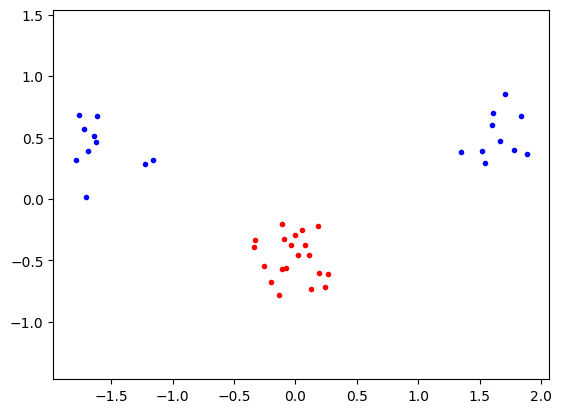

In [17]:
plt.plot( [ p [ 0 ] for p in classA ] ,
[ p [ 1 ] for p in classA ] ,
'b .' )
plt.plot([ p [ 0 ] for p in classB ] ,
[ p [ 1 ] for p in classB ] ,
'r .' )
plt.axis ( 'equal'  ) # Force same s c a l e on both axes
#plt.savefig('svmplot-pdf ') # Save a copy in a f i l e
plt.show ( ) # Show the p l o t on the screen